[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/classify-movie-review-using-rnns.ipynb)

## Check Tensorflow Version

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Imports

In [16]:
from tensorflow import keras
from tensorflow.python.keras import preprocessing 
from tensorflow.python.keras import layers 
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import SimpleRNN, LSTM, Embedding, Flatten, Dense, Bidirectional
from tensorflow.python.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import os

## Data Loading and Preprocessing

In [22]:
max_features = 10000
maxlen = 500
batch_size = 32

In [23]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [24]:
input_train.shape

(25000,)

In [25]:
y_train.shape

(25000,)

In [26]:
input_train = preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)

In [27]:
input_train.shape

(25000, 500)

In [28]:
y_train.shape

(25000,)

## Build Model

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model_history = history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.6970 - acc: 0.5246 - val_loss: 0.6824 - val_acc: 0.5588
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.6671 - acc: 0.5877 - val_loss: 0.6733 - val_acc: 0.5738
Epoch 3/10
 9984/20000 [=============>................] - ETA: 25s - loss: 0.6310 - acc: 0.6355

20000/20000 [==============================] - 54s 3ms/step - loss: 0.6216 - acc: 0.6445 - val_loss: 0.6008 - val_acc: 0.6664
Epoch 4/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5663 - acc: 0.7016 - val_loss: 0.5577 - val_acc: 0.7110
Epoch 5/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5154 - acc: 0.7454 - val_loss: 0.5497 - val_acc: 0.7170
Epoch 6/10
  384/20000 [..............................] - ETA: 50s - loss: 0.4754 - acc: 0.7708

20000/20000 [==============================] - 54s 3ms/step - loss: 0.4761 - acc: 0.7761 - val_loss: 0.5246 - val_acc: 0.7368
Epoch 7/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4500 - acc: 0.7940 - val_loss: 0.6254 - val_acc: 0.6944
Epoch 8/10
18432/20000 [==========================>...] - ETA: 3s - loss: 0.4210 - acc: 0.8122

20000/20000 [==============================] - 54s 3ms/step - loss: 0.4205 - acc: 0.8124 - val_loss: 0.7461 - val_acc: 0.6428
Epoch 9/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3945 - acc: 0.8286 - val_loss: 0.4745 - val_acc: 0.7878
Epoch 10/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3759 - acc: 0.8391 - val_loss: 0.4586 - val_acc: 0.7910


## Plotting Loss and Accuracy

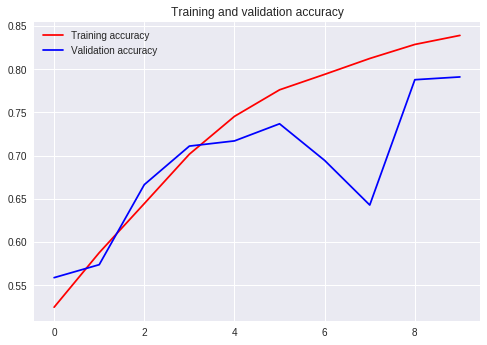

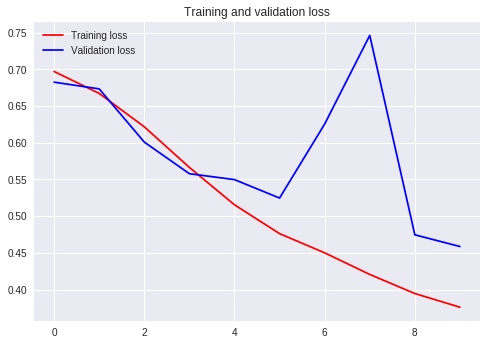

In [0]:
train_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Building a Model with LSTM instead of SimpleRNN

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model_history = history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.6748 - acc: 0.5650 - val_loss: 0.6615 - val_acc: 0.6054
Epoch 2/10
20000/20000 [==============================] - 245s 12ms/step - loss: 0.5851 - acc: 0.6948 - val_loss: 0.6016 - val_acc: 0.6662
Epoch 3/10
 9600/20000 [=============>................] - ETA: 1:59 - loss: 0.5121 - acc: 0.7548

20000/20000 [==============================] - 246s 12ms/step - loss: 0.4977 - acc: 0.7651 - val_loss: 0.6133 - val_acc: 0.6928
Epoch 4/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.4381 - acc: 0.8052 - val_loss: 0.3897 - val_acc: 0.8276
Epoch 5/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.3993 - acc: 0.8239 - val_loss: 0.4118 - val_acc: 0.8066


Epoch 6/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.3591 - acc: 0.8476 - val_loss: 0.3825 - val_acc: 0.8326
Epoch 7/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.3393 - acc: 0.8578 - val_loss: 0.4039 - val_acc: 0.8184
Epoch 8/10
16256/20000 [=======================>......] - ETA: 43s - loss: 0.3063 - acc: 0.8736

20000/20000 [==============================] - 247s 12ms/step - loss: 0.3102 - acc: 0.8719 - val_loss: 0.3501 - val_acc: 0.8518
Epoch 9/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.2999 - acc: 0.8776 - val_loss: 0.3399 - val_acc: 0.8528
Epoch 10/10
20000/20000 [==============================] - 246s 12ms/step - loss: 0.2757 - acc: 0.8873 - val_loss: 0.4260 - val_acc: 0.8244


## Plotting Loss and Accuracy of the LSTM model

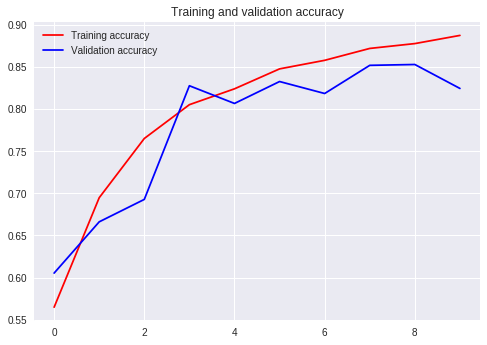

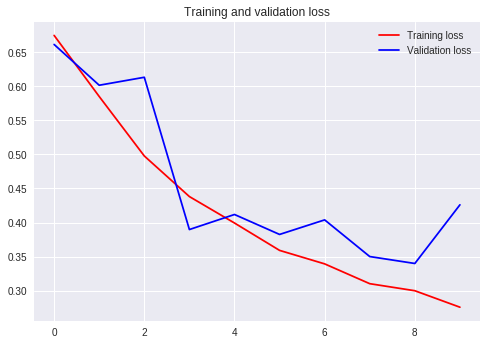

In [0]:
train_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Building Bidirectional GRU Model

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model_history = history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 624s 31ms/step - loss: 0.6810 - acc: 0.5512 - val_loss: 0.6291 - val_acc: 0.6686
Epoch 2/10
20000/20000 [==============================] - 621s 31ms/step - loss: 0.6006 - acc: 0.6865 - val_loss: 0.6766 - val_acc: 0.5988
Epoch 3/10
 9600/20000 [=============>................] - ETA: 5:02 - loss: 0.5228 - acc: 0.7495

20000/20000 [==============================] - 620s 31ms/step - loss: 0.5067 - acc: 0.7600 - val_loss: 0.6432 - val_acc: 0.6564
Epoch 4/10
20000/20000 [==============================] - 615s 31ms/step - loss: 0.4441 - acc: 0.7968 - val_loss: 0.4560 - val_acc: 0.7850
Epoch 5/10
20000/20000 [==============================] - 615s 31ms/step - loss: 0.3981 - acc: 0.8272 - val_loss: 0.4003 - val_acc: 0.8194


Epoch 6/10
20000/20000 [==============================] - 622s 31ms/step - loss: 0.3702 - acc: 0.8410 - val_loss: 0.3763 - val_acc: 0.8320
Epoch 7/10
20000/20000 [==============================] - 623s 31ms/step - loss: 0.3354 - acc: 0.8612 - val_loss: 0.4034 - val_acc: 0.8340
Epoch 8/10
16256/20000 [=======================>......] - ETA: 1:48 - loss: 0.3044 - acc: 0.8746

20000/20000 [==============================] - 624s 31ms/step - loss: 0.3075 - acc: 0.8728 - val_loss: 0.3128 - val_acc: 0.8706
Epoch 9/10
20000/20000 [==============================] - 608s 30ms/step - loss: 0.2870 - acc: 0.8805 - val_loss: 0.4787 - val_acc: 0.8222
Epoch 10/10
13696/20000 [===================>..........] - ETA: 2:58 - loss: 0.2789 - acc: 0.8891

## Plot Loss and Accuracy of the Model

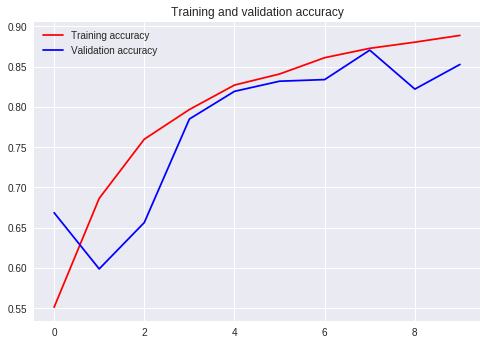

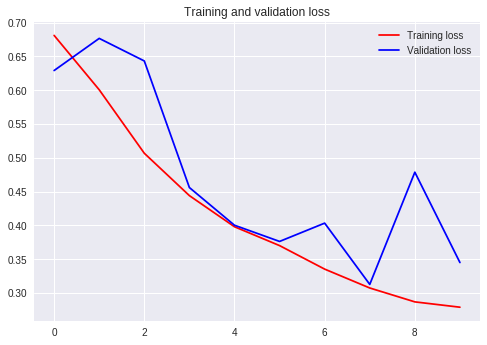

In [14]:
train_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Using 1d CNN Model

In [29]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [30]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [31]:
model_history = history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 244us/step - loss: 0.7749 - acc: 0.5046 - val_loss: 0.6993 - val_acc: 0.5264
Epoch 2/10
20000/20000 [==============================] - 4s 183us/step - loss: 0.7026 - acc: 0.5342 - val_loss: 0.7027 - val_acc: 0.5328
Epoch 3/10
20000/20000 [==============================] - 4s 183us/step - loss: 0.6819 - acc: 0.5650 - val_loss: 0.8355 - val_acc: 0.4958
Epoch 4/10
20000/20000 [==============================] - 4s 180us/step - loss: 0.6642 - acc: 0.5928 - val_loss: 0.7246 - val_acc: 0.5208
Epoch 5/10
11520/20000 [================>.............] - ETA: 1s - loss: 0.6456 - acc: 0.6292

20000/20000 [==============================] - 4s 183us/step - loss: 0.6453 - acc: 0.6289 - val_loss: 0.7729 - val_acc: 0.5162
Epoch 6/10
20000/20000 [==============================] - 4s 184us/step - loss: 0.6302 - acc: 0.6500 - val_loss: 0.6732 - val_acc: 0.5738
Epoch 7/10
20000/20000 [==============================] - 4s 193us/step - loss: 0.6121 - acc: 0.6721 - val_loss: 0.6752 - val_acc: 0.5764
Epoch 8/10
20000/20000 [==============================] - 4s 197us/step - loss: 0.5939 - acc: 0.6959 - val_loss: 0.6623 - val_acc: 0.5982
Epoch 9/10
17024/20000 [========================>.....] - ETA: 0s - loss: 0.5778 - acc: 0.7072

20000/20000 [==============================] - 4s 196us/step - loss: 0.5785 - acc: 0.7090 - val_loss: 0.7088 - val_acc: 0.5560
Epoch 10/10
20000/20000 [==============================] - 4s 199us/step - loss: 0.5599 - acc: 0.7384 - val_loss: 0.6912 - val_acc: 0.5780


## Plot Loss and Accuracy of the Model

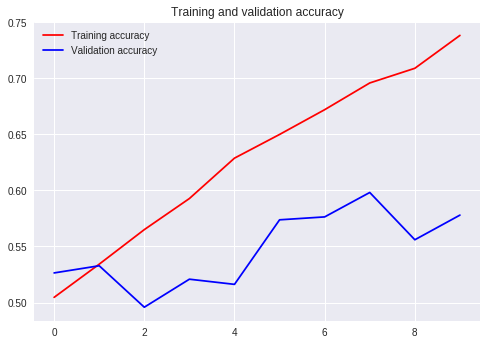

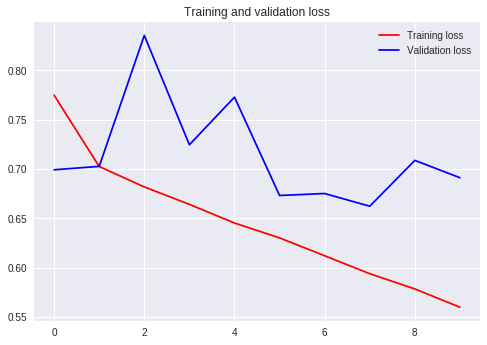

In [32]:
train_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()